## Начало лабораторной

Выгрузка данных из csv файла в датафрейм

In [3]:
import pandas as pd
df = pd.read_csv("..//static//csv//ds_salaries.csv")
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


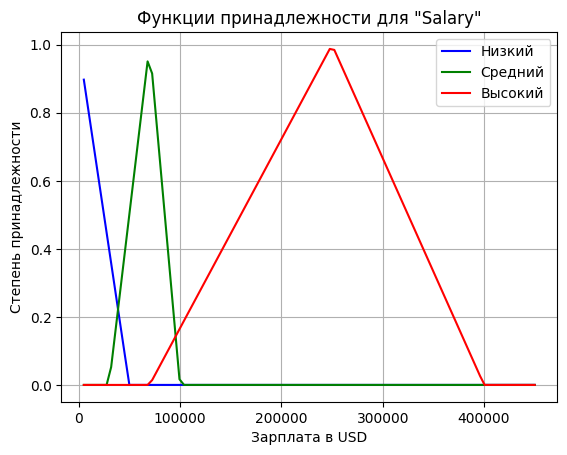

In [4]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# Определение диапазона значений для переменной "salary_in_usd"
x_salary = np.linspace(df['salary_in_usd'].min(), df['salary_in_usd'].max(), 100)

# Определение функций принадлежности для термов
# Низкий
low = fuzz.trimf(x_salary, [0, 0, 50000])
# Средний
medium = fuzz.trimf(x_salary, [30000, 70000, 100000])
# Высокий
high = fuzz.trimf(x_salary, [70000, 250000, 400000])

# Визуализация функций принадлежности
plt.figure()
plt.plot(x_salary, low, label='Низкий', color='blue')
plt.plot(x_salary, medium, label='Средний', color='green')
plt.plot(x_salary, high, label='Высокий', color='red')
plt.title('Функции принадлежности для "Salary"')
plt.xlabel('Зарплата в USD')
plt.ylabel('Степень принадлежности')
plt.legend()
plt.grid()
plt.show()

База нечетких правил

Нечеткие правила:
Если Опыт Низкий И Тип занятости Частичная, Тогда Зарплата Низкая.
Если Опыт Средний И Тип занятости Частичная, Тогда Зарплата Средняя.
Если Опыт Высокий И Тип занятости Полная, Тогда Зарплата Высокая.
Если Опыт Низкий И Тип занятости Полная, Тогда Зарплата Средняя.
Если Опыт Средний И Тип занятости Полная, Тогда Зарплата Высокая.


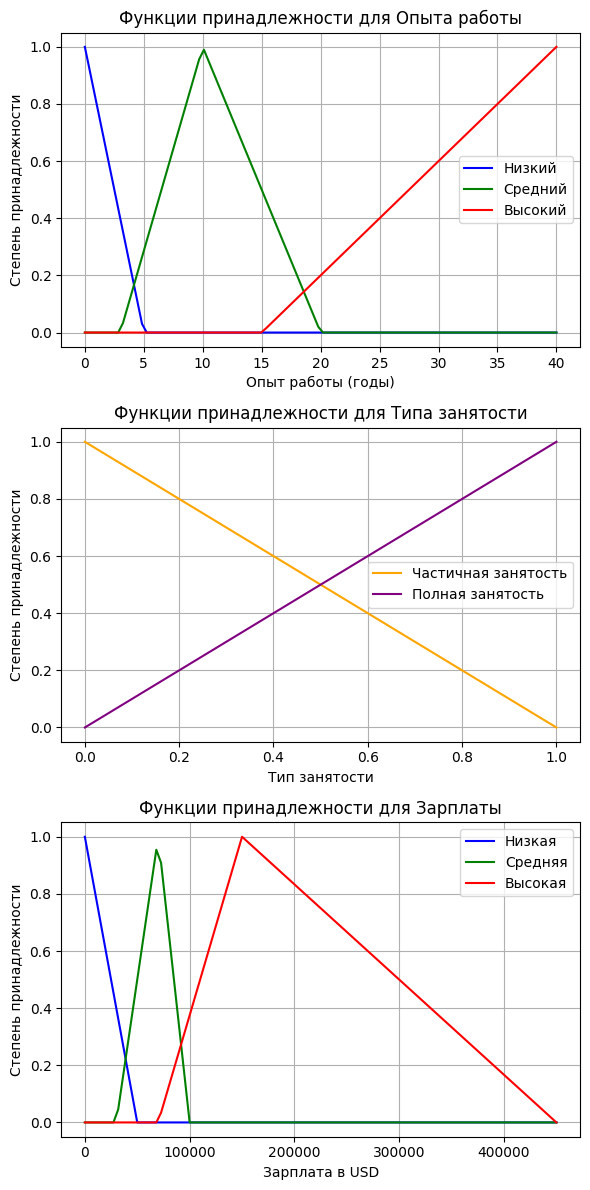

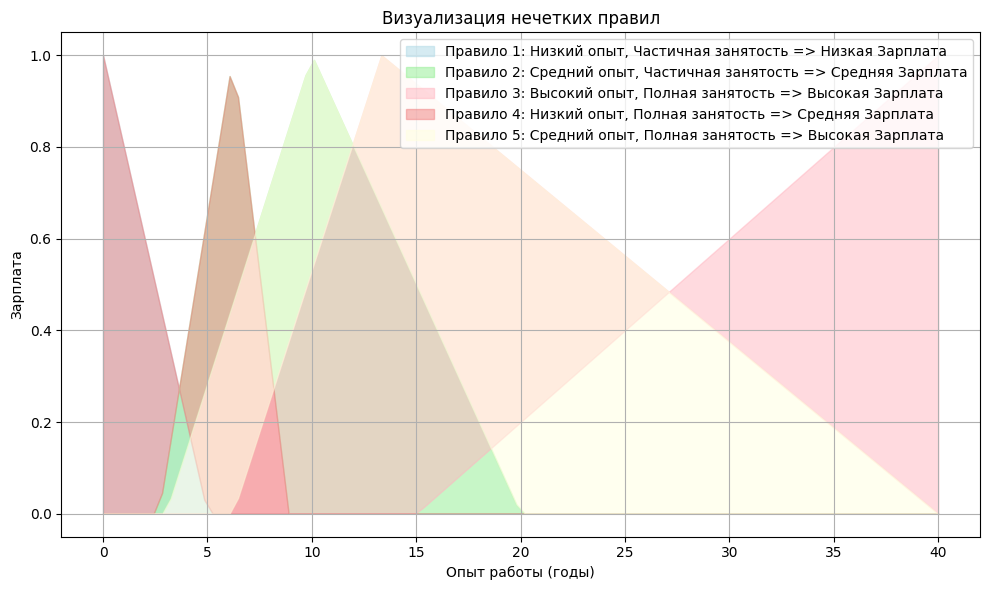

In [5]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# Определение диапазонов значений для входных переменных
x_experience = np.linspace(0, 40, 100)  # Опыт работы в годах
x_employment = np.array([0, 1])  # 0 - Частичная занятость, 1 - Полная занятость
x_salary = np.linspace(0, df['salary_in_usd'].max(), 100)  # Зарплата в USD

# Определение функций принадлежности для опыта работы
low_experience = fuzz.trimf(x_experience, [0, 0, 5])
medium_experience = fuzz.trimf(x_experience, [3, 10, 20])
high_experience = fuzz.trimf(x_experience, [15, 40, 40])

# Определение функций принадлежности для типа занятости
part_time = fuzz.trimf(x_employment, [0, 0, 1])  # Частичная занятость
full_time = fuzz.trimf(x_employment, [0, 1, 1])  # Полная занятость

# Определение функций принадлежности для зарплаты
low_salary = fuzz.trimf(x_salary, [0, 0, 50000])
medium_salary = fuzz.trimf(x_salary, [30000, 70000, 100000])
high_salary = fuzz.trimf(x_salary, [70000, 150000, df['salary_in_usd'].max()])

# Определение нечетких правил
fuzzy_rules = [
    ("Низкий", "Частичная", "Низкая"),
    ("Средний", "Частичная", "Средняя"),
    ("Высокий", "Полная", "Высокая"),
    ("Низкий", "Полная", "Средняя"),
    ("Средний", "Полная", "Высокая")
]

# Вывод правил
print("Нечеткие правила:")
for rule in fuzzy_rules:
    print(f"Если Опыт {rule[0]} И Тип занятости {rule[1]}, Тогда Зарплата {rule[2]}.")

# Визуализация функций принадлежности
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

# Опыт работы
axs[0].plot(x_experience, low_experience, label='Низкий', color='blue')
axs[0].plot(x_experience, medium_experience, label='Средний', color='green')
axs[0].plot(x_experience, high_experience, label='Высокий', color='red')
axs[0].set_title('Функции принадлежности для Опыта работы')
axs[0].set_xlabel('Опыт работы (годы)')
axs[0].set_ylabel('Степень принадлежности')
axs[0].legend()
axs[0].grid()

# Тип занятости
axs[1].plot(x_employment, part_time, label='Частичная занятость', color='orange')
axs[1].plot(x_employment, full_time, label='Полная занятость', color='purple')
axs[1].set_title('Функции принадлежности для Типа занятости')
axs[1].set_xlabel('Тип занятости')
axs[1].set_ylabel('Степень принадлежности')
axs[1].legend()
axs[1].grid()

# Зарплата
axs[2].plot(x_salary, low_salary, label='Низкая', color='blue')
axs[2].plot(x_salary, medium_salary, label='Средняя', color='green')
axs[2].plot(x_salary, high_salary, label='Высокая', color='red')
axs[2].set_title('Функции принадлежности для Зарплаты')
axs[2].set_xlabel('Зарплата в USD')
axs[2].set_ylabel('Степень принадлежности')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

# Визуализация нечетких правил
fig, ax = plt.subplots(figsize=(10, 6))

# Заполнение областей для каждого правила с новыми цветами
ax.fill_between(x_experience, low_experience, 0, color='lightblue', alpha=0.5, 
                label='Правило 1: Низкий опыт, Частичная занятость => Низкая Зарплата')
ax.fill_between(x_experience, medium_experience, medium_salary, color='lightgreen', alpha=0.5, 
                label='Правило 2: Средний опыт, Частичная занятость => Средняя Зарплата')
ax.fill_between(x_experience, high_experience, high_salary, color='lightpink', alpha=0.5, 
                label='Правило 3: Высокий опыт, Полная занятость => Высокая Зарплата')
ax.fill_between(x_experience, low_experience, medium_salary, color='lightcoral', alpha=0.5, 
                label='Правило 4: Низкий опыт, Полная занятость => Средняя Зарплата')
ax.fill_between(x_experience, medium_experience, high_salary, color='lightyellow', alpha=0.5, 
                label='Правило 5: Средний опыт, Полная занятость => Высокая Зарплата')

ax.set_title('Визуализация нечетких правил')
ax.set_xlabel('Опыт работы (годы)')
ax.set_ylabel('Зарплата')
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

Оценка качества полученной нечеткой системы

In [6]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# Определение диапазонов значений для входных переменных
x_experience = np.linspace(0, 40, 100)  # Опыт работы в годах
x_employment = np.array([0, 1])  # 0 - Частичная занятость, 1 - Полная занятость
x_salary = np.linspace(0, df['salary_in_usd'].max(), 100)  # Зарплата в USD

# Определение функций принадлежности для опыта работы
low_experience = fuzz.trimf(x_experience, [0, 0, 5])
medium_experience = fuzz.trimf(x_experience, [3, 10, 20])
high_experience = fuzz.trimf(x_experience, [15, 40, 40])

# Определение функций принадлежности для типа занятости
part_time = fuzz.trimf(x_employment, [0, 0, 1])  # Частичная занятость
full_time = fuzz.trimf(x_employment, [0, 1, 1])  # Полная занятость

# Определение функций принадлежности для зарплаты
low_salary = fuzz.trimf(x_salary, [0, 0, 50000])
medium_salary = fuzz.trimf(x_salary, [30000, 70000, 100000])
high_salary = fuzz.trimf(x_salary, [70000, 150000, df['salary_in_usd'].max()])

# Создаем тестовые данные (опыт работы, тип занятости, эталонная зарплата)
test_data = [
    (2, 0, 40000),  # Низкий опыт, частичная занятость => Низкая зарплата
    (5, 0, 60000),  # Низкий опыт, частичная занятость => Средняя зарплата
    (10, 1, 80000),  # Средний опыт, полная занятость => Средняя зарплата
    (15, 1, 120000),  # Высокий опыт, полная занятость => Высокая зарплата
]

# Функция для вычисления нечеткой оценки
def fuzzy_inference(experience, employment):
    # Определение степени принадлежности
    exp_low = fuzz.interp_membership(x_experience, low_experience, experience)
    exp_medium = fuzz.interp_membership(x_experience, medium_experience, experience)
    exp_high = fuzz.interp_membership(x_experience, high_experience, experience)

    emp_part_time = fuzz.interp_membership(x_employment, part_time, employment)
    emp_full_time = fuzz.interp_membership(x_employment, full_time, employment)

    # Применяем правила
    salary_low = np.fmin(exp_low, emp_part_time)
    salary_medium = np.fmin(exp_medium, emp_part_time)
    salary_high = np.fmin(exp_high, emp_full_time)

    # Вычисляем выходные значения при наличии ненулевых областей
    salary0 = low_salary * salary_low
    salary1 = medium_salary * salary_medium
    salary2 = high_salary * salary_high

    # Проверка на ненулевые области перед дефуззацией
    if salary_low > 0:
        salary0 = fuzz.defuzz(x_salary, salary0, 'centroid')
    else:
        salary0 = 0  # Значение по умолчанию

    if salary_medium > 0:
        salary1 = fuzz.defuzz(x_salary, salary1, 'centroid')
    else:
        salary1 = 0  # Значение по умолчанию

    if salary_high > 0:
        salary2 = fuzz.defuzz(x_salary, salary2, 'centroid')
    else:
        salary2 = 0  # Значение по умолчанию

    return max(salary0, salary1, salary2)

# Список для хранения результатов
results = []

# Оценка системы на тестовом наборе данных
for experience, employment, actual_salary in test_data:
    inferred_salary = fuzzy_inference(experience, employment)
    results.append((experience, employment, actual_salary, inferred_salary))

# Вывод результатов
print("Опыт работы | Тип занятости | Эталонная зарплата | Оцененная зарплата")
for experience, employment, actual_salary, inferred_salary in results:
    employment_type = "Частичная" if employment == 0 else "Полная"
    print(f"{experience:12} | {employment_type:13} | {actual_salary:20} | {inferred_salary:.2f}")

# Вычисление метрик качества
actual_salaries = [actual for _, _, actual, _ in results]
inferred_salaries = [inferred for _, _, _, inferred in results]

mae = np.mean(np.abs(np.array(actual_salaries) - np.array(inferred_salaries)))
rmse = np.sqrt(np.mean((np.array(actual_salaries) - np.array(inferred_salaries)) ** 2))

print(f"\nСредняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (RMSE): {rmse:.2f}")

Опыт работы | Тип занятости | Эталонная зарплата | Оцененная зарплата
           2 | Частичная     |                40000 | 16666.67
           5 | Частичная     |                60000 | 66585.98
          10 | Полная        |                80000 | 0.00
          15 | Полная        |               120000 | 223308.38

Средняя абсолютная ошибка (MAE): 53306.92
Среднеквадратичная ошибка (RMSE): 66446.29



Полученные результаты указывают на необходимость значительных улучшений в проектировании нечеткой системы. Высокие значения средней абсолютной ошибки (MAE) и среднеквадратичной ошибки (RMSE) свидетельствуют о том, что система неэффективно обрабатывает входные данные. Особенно заметна проблема нулевой оценки для случая с 10 годами опыта, что указывает на серьезные недостатки в определении правил и функций принадлежности. Это требует дальнейшей работы над уточнением правил и пересмотром функций принадлежности для достижения более точных оценок зарплат. 